# Используемые пакеты

In [1]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ирисы Фишера
Выборка взята отсюда: https://archive.ics.uci.edu/ml/datasets/iris

## Загрузка выборки

In [4]:
dataset = pd.read_csv('data/iris.csv', 
                      header=None, 
                      names=['длина чашелистика', 'ширина чашелистика', 
                             'длина лепестка', 'ширина лепестка', 'класс'])
dataset.sample(5, random_state=0)

длина чашелистика  ширина чашелистика  длина лепестка  ширина лепестка  \
114                5.8                 2.8             5.1              2.4   
62                 6.0                 2.2             4.0              1.0   
33                 5.5                 4.2             1.4              0.2   
107                7.3                 2.9             6.3              1.8   
7                  5.0                 3.4             1.5              0.2   

               класс  
114   Iris-virginica  
62   Iris-versicolor  
33       Iris-setosa  
107   Iris-virginica  
7        Iris-setosa

## Начало работы с данными
1. Определить множество объектов:
    * Определить размер выборки
    * Определить признаки, которыми описываются объекты
2. Определить множество ответов
3. Определить тип задачи машинного обучения
6. ...

### Множество объектов
В данной задачи множество объектов описывается $n=4$ признаками:
1. Длина чашелистика
2. Ширина чашелистика
3. Длина лепестка
4. Ширина лепестка

In [5]:
print('Размер выборки составляет l={} объектов.'.format(len(dataset)))

Размер выборки составляет l=150 объектов.


Все признаки являются вещественными признаками. Формально объекты $\mathbf{X}$ представляються в следующем виде:
$$\mathbf{X} \in \mathbb{R}^{l\times n},$$
где $l$ число объектов, а $n$ число признаков.

Получаем, что $\mathbf{X}$ это некоторая вещественная матрица размера $l\times n$.

### Множество ответов
В данной задаче множество ответов состоит из трех элементов:
1. Iris-virginica
2. Iris-versicolor
3. Iris-setosa

### Задача машинного обучения
В нашем случае, так как мощность множества $|\mathbf{y}|=3 \ll l=150$ получаем задачу классификации на $M=3$ класса.

## Анализ данных
Сначала проэктируем все объекты на двумерные плоскости, для упрощения анализа

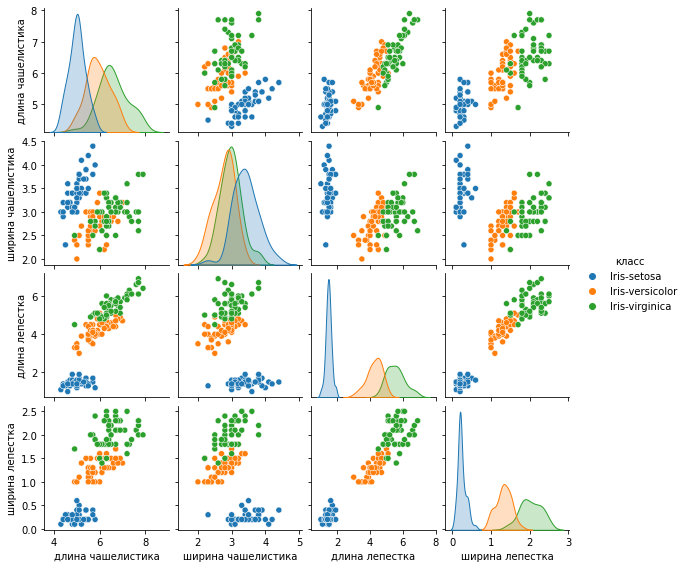

In [6]:
sns.pairplot(dataset, hue='класс', height=2)
plt.show()

Из рисунка видно, что класс синих точек (Iris-setosa) легко отделяется от двух других цветов. Оранджевые и зеленные точки отделяются не так просто в каждой из проэкций, но все равно можно провести прямую, которая отделит оранджевые точки от зеленых.

## Построение модели
### Преобразование данных
Как было сказано ранее нам требуется решить задачу классификации на 3 класса. Но для наглядноси рассмотрим бинарную классификацию (классификацию на несколько классов рассмотрим в следующей лекции).

Чтобы исходную задачу преобразовать в задачу бинарной классификации уберем из выборки все объекта класса Iris-setosa.

In [8]:
dataset.drop(index=dataset.index[dataset['класс'] == 'Iris-setosa'])

длина чашелистика  ширина чашелистика  длина лепестка  ширина лепестка  \
0                  5.1                 3.5             1.4              0.2   
1                  4.9                 3.0             1.4              0.2   
2                  4.7                 3.2             1.3              0.2   
3                  4.6                 3.1             1.5              0.2   
4                  5.0                 3.6             1.4              0.2   
..                 ...                 ...             ...              ...   
145                6.7                 3.0             5.2              2.3   
146                6.3                 2.5             5.0              1.9   
147                6.5                 3.0             5.2              2.0   
148                6.2                 3.4             5.4              2.3   
149                5.9                 3.0             5.1              1.8   

              класс  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 5 columns]

In [12]:
binary_dataset = dataset.drop(index=dataset.index[dataset['класс'] == 'Iris-setosa'])

Классы закодируем целыми числами $-1$ и $1$.

In [21]:
binary_dataset.loc[dataset['класс'] == 'Iris-versicolor', dataset.columns == 'класс'] = -1
binary_dataset.loc[dataset['класс'] == 'Iris-virginica', dataset.columns == 'класс'] = 1

Получаем задачу бинарной классификации.

### Поиск оптимального вектора параметров
Перейдем к двум матрицам:
1. Матрице объектов $\mathbf{X} \in \mathbb{R}^{l\times (n+1)}$
2. Вектору ответов $\mathbf{y} \in \{-1,1\}^l$

Заметим, что объекты мы погрузили в пространство более большой размерности, добавив еще один признак, который у всех объектов будет равен $1$.

In [23]:
X = binary_dataset.iloc[:, binary_dataset.columns != 'класс'].values

In [25]:
type(X)

numpy.ndarray

In [26]:
X = binary_dataset.iloc[:, binary_dataset.columns != 'класс'].values
y = binary_dataset.iloc[:, binary_dataset.columns == 'класс'].values.reshape(-1)
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.int64)

In [29]:
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, y)

Получаем вектор оптимальных параметров $\hat{\theta}$

In [30]:
model.coef_

array([[-0.39443136, -0.51327025,  2.93075043,  2.4170433 ]])

## Один против всех

Данные метод основан на том, что для классификации на $M>2$ классов нужно построить $M$ линейных классификаторов, которые классифицируют $k$-й класс прорив всех остальных классов.

## Проверка результатов

In [34]:
test = np.array([[7.0, 3.2, 4.7,1.4], [6.7, 3.0, 5.2, 2.3]])

In [77]:
from sklearn.metrics import classification_report
print(classification_report( - y, model.predict(X), labels=[-1, 1]))

              precision    recall  f1-score   support

          -1       0.02      0.02      0.02        50
           1       0.06      0.06      0.06        50

    accuracy                           0.04       100
   macro avg       0.04      0.04      0.04       100
weighted avg       0.04      0.04      0.04       100



In [33]:
model.predict(test)

array([-1])

In [79]:
binary_dataset

длина чашелистика  ширина чашелистика  длина лепестка  ширина лепестка  \
50                 7.0                 3.2             4.7              1.4   
51                 6.4                 3.2             4.5              1.5   
52                 6.9                 3.1             4.9              1.5   
53                 5.5                 2.3             4.0              1.3   
54                 6.5                 2.8             4.6              1.5   
..                 ...                 ...             ...              ...   
145                6.7                 3.0             5.2              2.3   
146                6.3                 2.5             5.0              1.9   
147                6.5                 3.0             5.2              2.0   
148                6.2                 3.4             5.4              2.3   
149                5.9                 3.0             5.1              1.8   

    класс  
50     -1  
51     -1  
52     -1  
53     -1  
54     -1  
..    ...  
145     1  
146     1  
147     1  
148     1  
149     1  

[100 rows x 5 columns]

In [52]:
# https://archive.ics.uci.edu/ml/datasets/Adult
# Задача 1. скачать датасет
# Задача 2. Посчитать количество мужчин и женщин
# Задача 3. Средний возраст мужчик и женщин
# Задача 4. Медианный возраст мужчик и женщин
# Задача 5. Сколько женщин, мужчин имеют высшее образование
# Задача 6. Какой средний прирост капитала у мужчин/женщин
# Задача 7. Какой средний прирост капитала В зависимости от рода знятий
# Задача 8. Соотношение семейных, не семейных, разведенных
# Задача 9. Процент разводов зависимости от образования
# Задача 10. Придумайте сами какой срез вам интересен (= 
# https://www.machinelearningplus.com/python/101-pandas-exercises-python/